## Advanced Regression Assignment

In [1]:
# Let's import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("train.csv")
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
#printing the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
data.shape

(1460, 81)

In [5]:
data.LotFrontage.isnull().sum()

259

### Missing value treatment

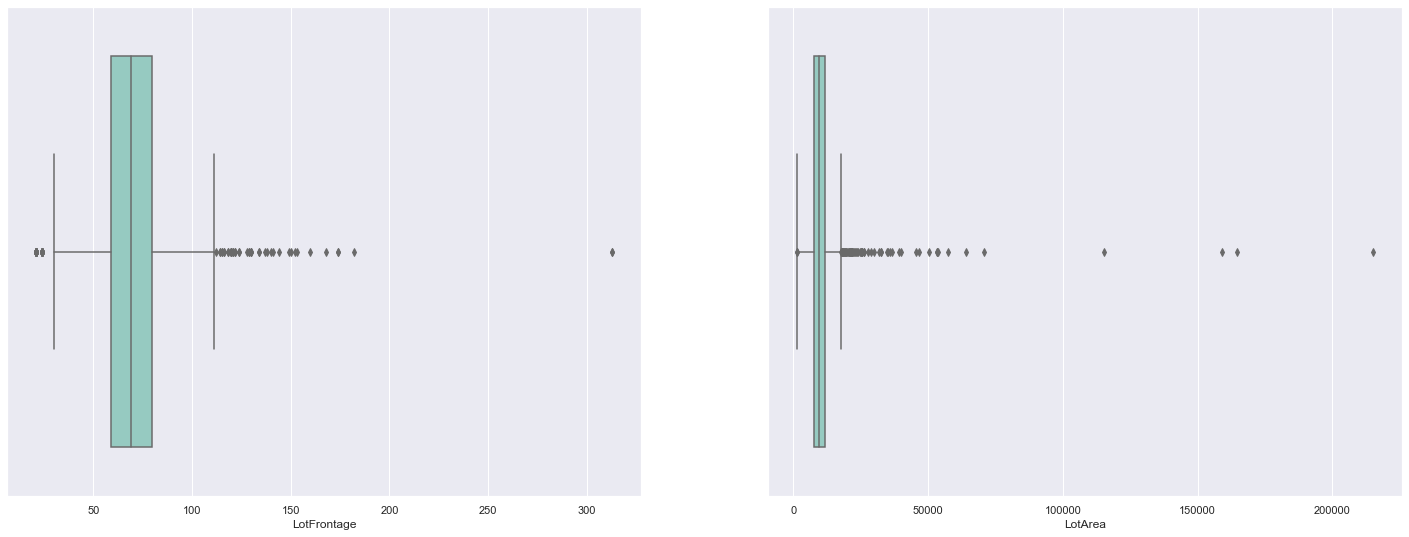

In [6]:
# Compare these columns with their Boxplots
sns.set(rc={'figure.figsize':(25,9)})

fig, axes = plt.subplots(1, 2)
axes = axes.flatten()

sns.set_style("darkgrid")

ax = sns.boxplot(x=data["LotFrontage"], ax=axes[0], palette="Set3")
ax = sns.boxplot(x=data["LotArea"], ax=axes[1], palette="Set3")

# Show the plot.
plt.show()

In [7]:
# imputing the missing values of LotFrontage which is continuous variable with its median as 
# we see some outliers in the variable
LotFMedian = data.LotFrontage.median()
data.LotFrontage.fillna(LotFMedian, inplace= True)
data.LotFrontage.isnull().sum()

0

In [8]:
# Missing value percentage in all the variables
round(100*(data.isnull().sum()/len(data.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage       0.00
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [9]:
# Here we drop all such variables which have 90%+ missing values as we do not need them for model building 
# as 93.77 % of this feature has NA, there is no variance hence dropping this column
data.drop('Alley', axis=1, inplace = True)

In [10]:
# as 99 % of this feature has NA, there is no variance hence dropping this column
data.drop('PoolQC', axis=1, inplace = True)

In [11]:
# as 96 % of this feature has NA, there is no variance hence dropping this column
data.drop('MiscFeature', axis=1, inplace = True)

In [12]:
# Checking the shape after dropping the columns
data.shape

(1460, 78)

In [13]:
# Just checkin
data.GarageQual.value_counts(dropna = False)

TA     1311
NaN      81
Fa       48
Gd       14
Ex        3
Po        3
Name: GarageQual, dtype: int64

In [14]:
data.GarageCond.value_counts(dropna = False)

TA     1326
NaN      81
Fa       35
Gd        9
Po        7
Ex        2
Name: GarageCond, dtype: int64

In [15]:
data.Electrical.value_counts(dropna = False)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [16]:
data['Electrical'] = data['Electrical'].astype('str')
elecMode = data.Electrical.mode()
elecMode

0    SBrkr
dtype: object

In [17]:
# Imputing the missing values for Electrical with mode
elecMode = data.Electrical.mode()
data.Electrical.fillna(elecMode, inplace = True)
data.Electrical.isnull().sum()
data['Electrical'] = data['Electrical'].astype('object')

In [18]:
# Just a check after imputing
data.Electrical.isnull().sum()

0

In [19]:
data.MasVnrType.value_counts(dropna = False)

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

In [20]:
data['MasVnrType'] = data['MasVnrType'].astype('str')

In [21]:
# Imputing the missing values for MasVnrType with mode
masVnrMode = data.MasVnrType.mode()
data.MasVnrType.fillna(masVnrMode, inplace = True)
data.MasVnrType.isnull().sum()
data['MasVnrType'] = data['MasVnrType'].astype('object')

In [22]:
data.MasVnrArea.fillna(0, inplace = True)
data.MasVnrArea.isnull().sum()

0

In [23]:
# We need to impute the NaN values with NA category after checking the dataset csv file
# Here NA is one of the category which indicates this Basement is not present.
# There are many such variables where we need to impute NA category.
# Below are all such varaibles.
data.BsmtQual.fillna('NA', inplace = True)
data.BsmtQual.isnull().sum()

0

In [24]:
data.BsmtCond.fillna('NA', inplace = True)
data.BsmtCond.isnull().sum()

0

In [25]:
data.FireplaceQu.fillna('NA', inplace = True)
data.FireplaceQu.isnull().sum()

0

In [26]:
data.GarageType.fillna('NA', inplace = True)
data.GarageType.isnull().sum()

0

In [27]:
data.GarageFinish.fillna('NA', inplace = True)
data.GarageFinish.isnull().sum()

0

In [28]:
data.GarageQual.fillna('NA', inplace = True)
data.GarageQual.isnull().sum()

0

In [29]:
data.GarageCond.fillna('NA', inplace = True)
data.GarageCond.isnull().sum()

0

In [30]:
data.BsmtExposure.fillna('NA', inplace = True)
data.BsmtExposure.isnull().sum()

0

In [31]:
data.BsmtFinType1.fillna('NA', inplace = True)
data.BsmtFinType1.isnull().sum()

0

In [32]:
data.BsmtFinType2.fillna('NA', inplace = True)
data.BsmtFinType2.isnull().sum()

0

In [33]:
data.Fence.fillna('NA', inplace = True)
data.Fence.isnull().sum()

0

In [34]:
# There seems to be no variance in this hence can be deleted
#data.drop('Utilities', axis=1, inplace = True)

In [35]:
# Adding new variable for age as HouseAge which is calculated using YrSold and YearBuilt
data['HouseAge'] = data['YrSold'] - data['YearBuilt']

In [36]:
# Adding new variable for remodel age as RemodeledAge which is calculated using YrSold and YearRemodAdd
data['RemodeledAge'] = data['YrSold'] - data['YearRemodAdd']

In [37]:
# Adding new variable for age of Garage using YrSold and Year GarageYrBlt
data['GarageAge'] = data['YrSold'] - data['GarageYrBlt']

# Just check all the three age columns are added
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseAge,RemodeledAge,GarageAge
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,0,2,2008,WD,Normal,208500,5,5,5.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,0,5,2007,WD,Normal,181500,31,31,31.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,0,9,2008,WD,Normal,223500,7,6,7.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,0,2,2006,WD,Abnorml,140000,91,36,8.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,0,12,2008,WD,Normal,250000,8,8,8.0


In [38]:
# Garage age has null values as there is NA category for Garage meaning there is no Garage Present
data.GarageAge.isnull().sum()

81

In [39]:
data.GarageAge.describe()

count    1379.000000
mean       29.306019
std        24.726881
min         0.000000
25%         6.000000
50%        28.000000
75%        47.000000
max       107.000000
Name: GarageAge, dtype: float64

In [40]:
# For these null values of Garage Age we impute them with some value which is more than the max age of garage in the 
# dataset. This indicates that there is no garage and accordingly will have effect while modelling
data.GarageAge.fillna(140, inplace = True)
data.GarageAge.isnull().sum()

0

In [41]:
# Now deleting the unwanted year columns
data['YrSold'] = 2021 - data['YrSold']
data.drop(["GarageYrBlt", 'YearRemodAdd', 'YearBuilt', 'Id'],axis=1, inplace = True)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseAge,RemodeledAge,GarageAge
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,0,2,13,WD,Normal,208500,5,5,5.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,0,5,14,WD,Normal,181500,31,31,31.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,0,9,13,WD,Normal,223500,7,6,7.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,0,2,15,WD,Abnorml,140000,91,36,8.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,0,12,13,WD,Normal,250000,8,8,8.0


In [42]:
# Making sure all the missing values are imputed
round(100*(data.isnull().sum()/len(data.index)), 2)

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr 

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

### Creation of Dummy variables, Label Encoding and Outlier treatment

In [44]:
# Identifying the numeric variables
from pandas.api.types import is_numeric_dtype
numericcolumns = [col for col in data if is_numeric_dtype(data[col])]
numericcolumns

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'HouseAge',
 'RemodeledAge',
 'GarageAge']

In [45]:
# Below is the code to get the pair plots for continuous variables but the
# notebook hangs for this number of variables

#%matplotlib inline
#import matplotlib.pyplot as plt
#import matplotlib.ticker as mtick
#
#import seaborn as sns 
##x_for_pair_plt = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
#sns.pairplot(data, x_vars= numericcolumns, y_vars = numericcolumns)
#plt.show()

# pair plots for continuous variables

In [46]:
X = data
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseAge,RemodeledAge,GarageAge
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,0,2,13,WD,Normal,208500,5,5,5.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,0,5,14,WD,Normal,181500,31,31,31.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,0,9,13,WD,Normal,223500,7,6,7.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,0,2,15,WD,Abnorml,140000,91,36,8.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,0,12,13,WD,Normal,250000,8,8,8.0


In [47]:
X.shape

(1460, 77)

In [48]:
from pandas.api.types import is_object_dtype
categorycolumns = [col for col in data if is_object_dtype(data[col])]
len(categorycolumns)

40

In [49]:
# Following are the variables for Label Encoding
categoryColnForLabel =  ['ExterQual','ExterCond', 'BsmtQual','BsmtCond',
                         'HeatingQC','KitchenQual','FireplaceQu', 'GarageQual', 'GarageCond',
                        'BsmtFinType1', 'BsmtFinType2','BsmtExposure']
len(categoryColnForLabel)                         

12

In [50]:
# Next comes creation of dummy variables
# Following are the variables for which we create dummy variables
cat_columns_dummies = ['MSZoning', 'Street', 'LotShape', 'Neighborhood','LandContour', 'LotConfig',
       'LandSlope',  'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType',  'Foundation', 
       'Heating','CentralAir', 'Electrical', 'Functional', 'Utilities', 'Fence',
              'PavedDrive', 'SaleType', 'SaleCondition', 'GarageType','GarageFinish']
len(cat_columns_dummies)

28

In [51]:
# creating dummy variables
status = pd.get_dummies(X[cat_columns_dummies], columns = cat_columns_dummies, drop_first = True)
X = pd.concat([X, status], axis = 1)
X.drop(cat_columns_dummies, axis = 1, inplace = True)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,HouseAge,RemodeledAge,GarageAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_nan,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_nan,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Utilities_NoSeWa,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,60,65.0,8450,7,5,196.0,Gd,TA,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,NA,2,548,TA,TA,0,61,0,0,0,0,0,2,13,208500,5,5,5.0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,TA,TA,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,2,460,TA,TA,298,0,0,0,0,0,0,5,14,181500,31,31,31.0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [52]:
X.shape

(1460, 212)

In [53]:
# Doing Label Encoding
cat_qual_dict = {'NA': 1, 'Po': 2, 'Fa': 3, 'TA': 4, 'Gd': 5, 'Ex': 6, 
                 'Unf': 2, 'LwQ': 3, 'Rec': 4, 'BLQ': 5, 'ALQ': 6, 'GLQ': 7 , 'No': 2, 'Mn': 3, 'Av': 4}

for col in categoryColnForLabel:
    X[col] = X[col].map(cat_qual_dict)
        
X.sample(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,HouseAge,RemodeledAge,GarageAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_nan,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_nan,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Utilities_NoSeWa,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
1452,180,35.0,3675,5,5,80.0,4,4,5,4,5,7,547,2,0,0,547,5,1072,0,0,1072,1,0,1,0,2,1,4,5,0,1,2,525,4,4,0,28,0,0,0,0,0,5,15,145000,1,1,1.0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
619,60,85.0,12244,8,5,226.0,5,4,5,4,5,7,871,2,0,611,1482,6,1482,780,0,2262,1,0,2,1,4,1,5,10,2,5,3,749,4,4,168,0,0,0,0,0,0,8,13,305000,5,5,5.0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0

In [54]:
# Just check for columns 
X.shape

(1460, 212)

In [55]:
# COntinuous variables for outlier analysis
contVarForOutlier = ['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 #'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 #'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF']
 #'EnclosedPorch',
 #'3SsnPorch',
 #'ScreenPorch',
 #'MiscVal']

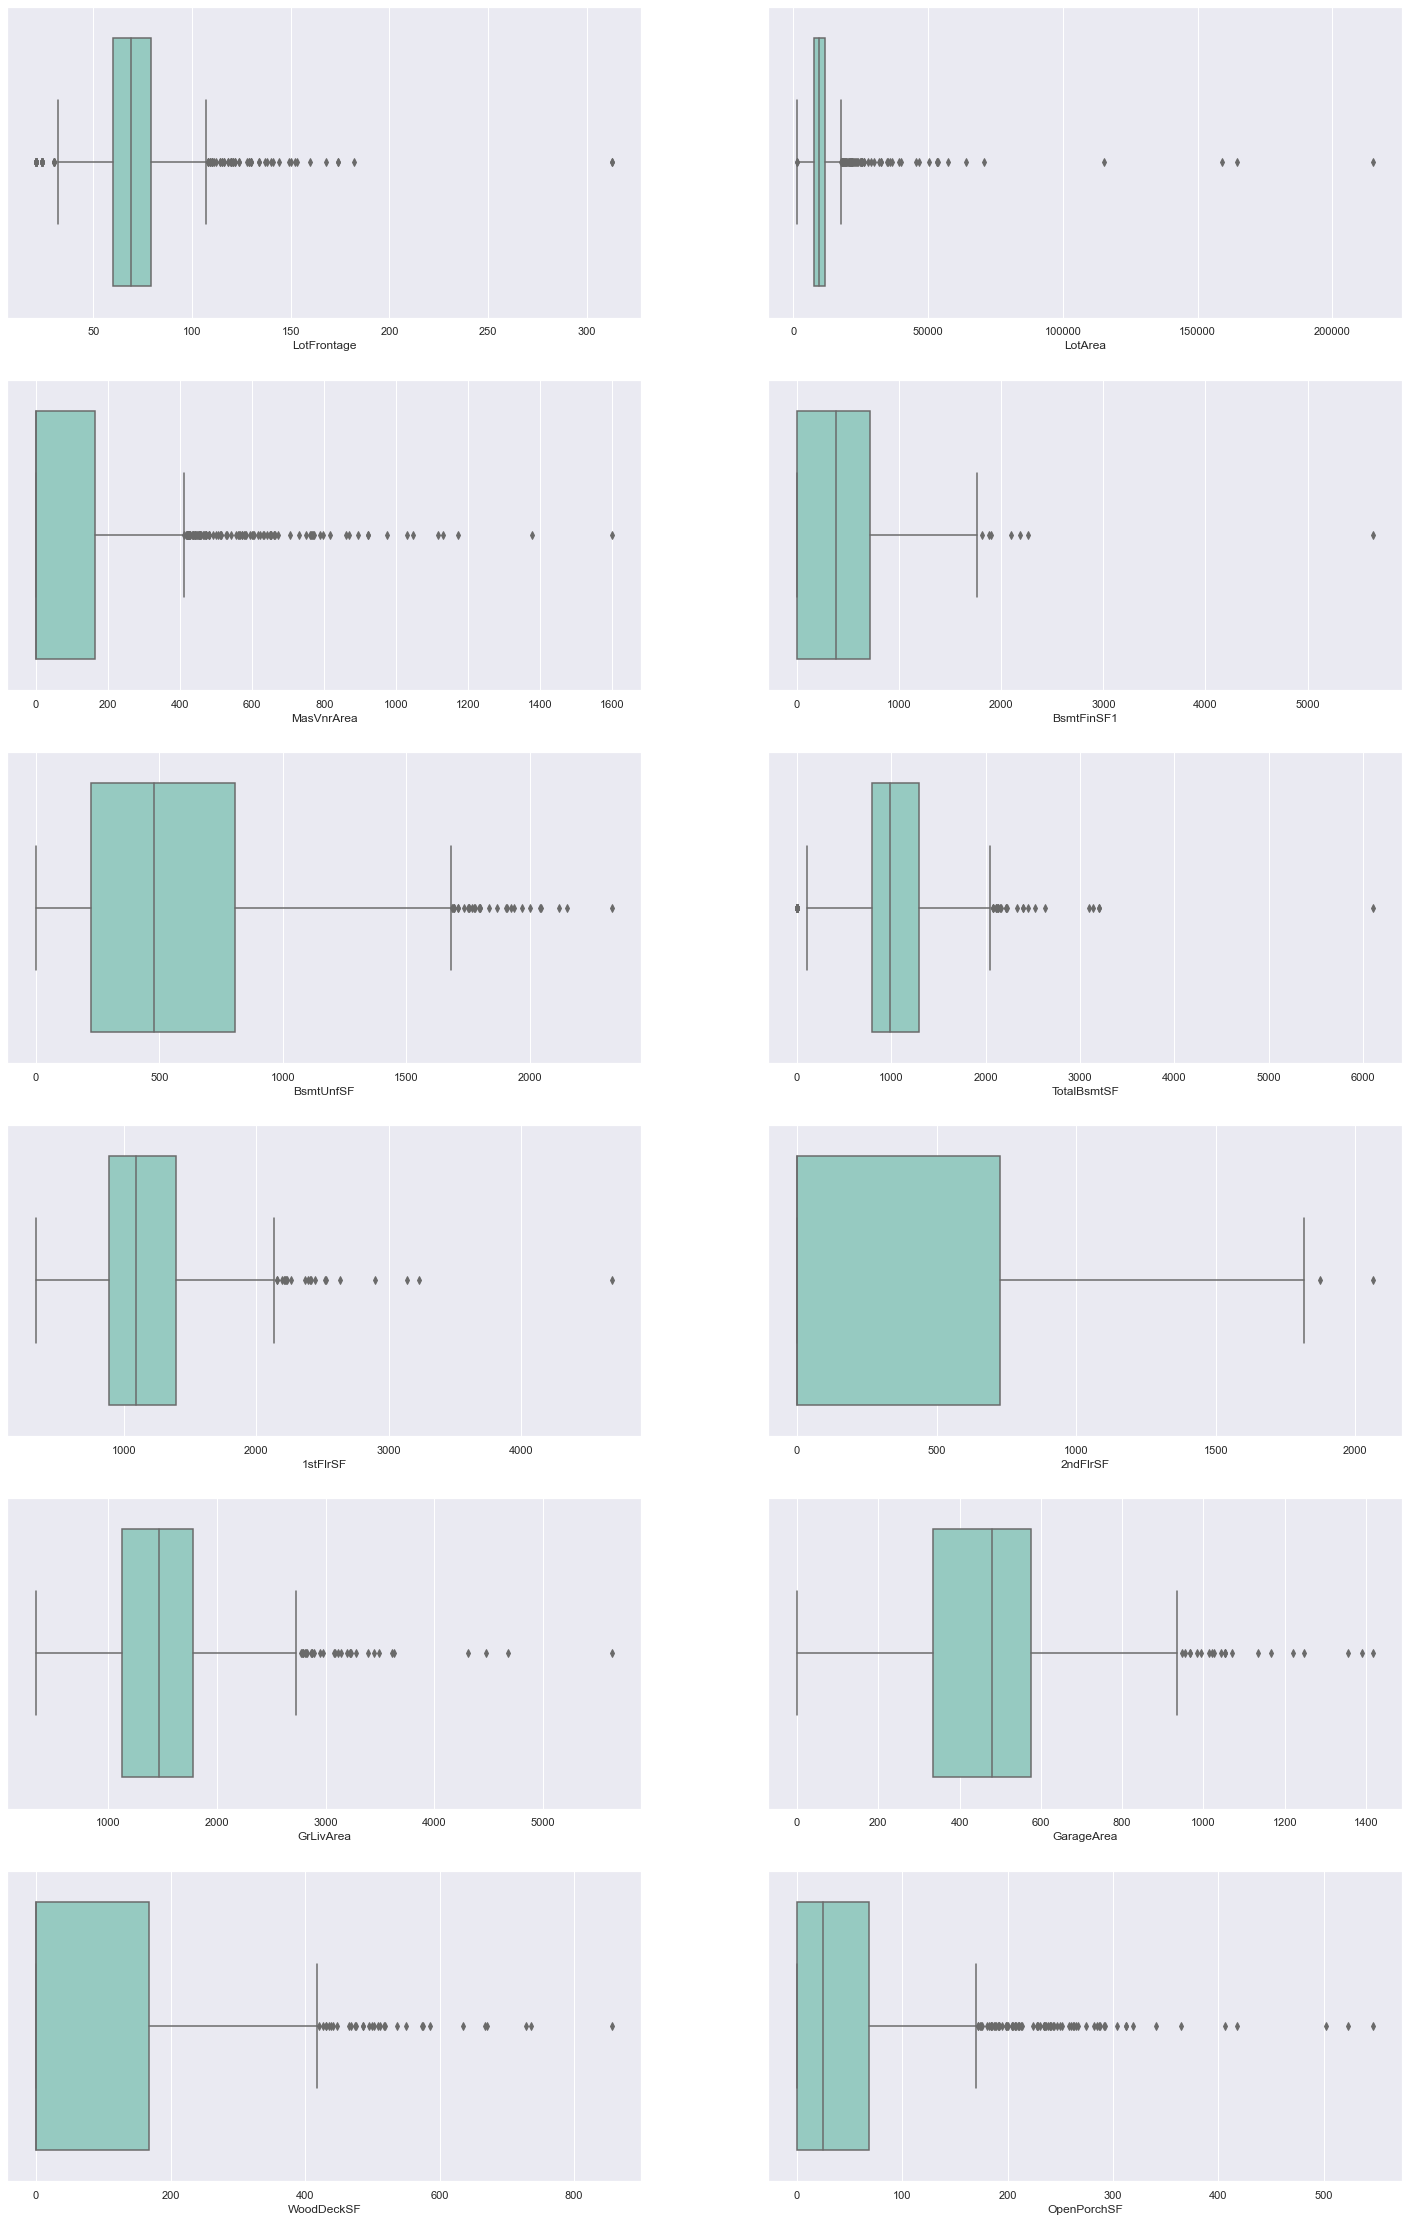

In [56]:
# Compare these columns with their Boxplots
sns.set(rc={'figure.figsize':(25,40)})

fig, axes = plt.subplots(6, 2)
axes = axes.flatten()

sns.set_style("darkgrid")

i = 0
for col in contVarForOutlier:
    ax = sns.boxplot(x=X[col], ax=axes[i], palette="Set3")
    i+=1
    
# Show the plot.
plt.show()

In [57]:
# We are capping the outliers to the fences of the box plots
def outlierCapping(df, cols) :
    
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upperWhisker = q3 + 1.5*iqr
        lowerWhisker = q1 - 1.5*iqr
        
        df[col]=np.where(df[col] > upperWhisker , upperWhisker , 
                         np.where(df[col] < lowerWhisker , lowerWhisker, df[col]))


In [58]:
# Doing the outlier capping
outlierCapping(X, contVarForOutlier)
#Plotting after outlier capping
sns.set(rc={'figure.figsize':(25,40)})

#fig, axes = plt.subplots(7, 2)
#axes1 = axes.flatten()
#
#sns.set_style("darkgrid")
#i = 0
#for col in contVarForOutlier:
#    ax = sns.boxplot(x=X[col], ax=axes1[i], palette="Set3")
#    i+=1
#

### EDA - Correlation Matrix

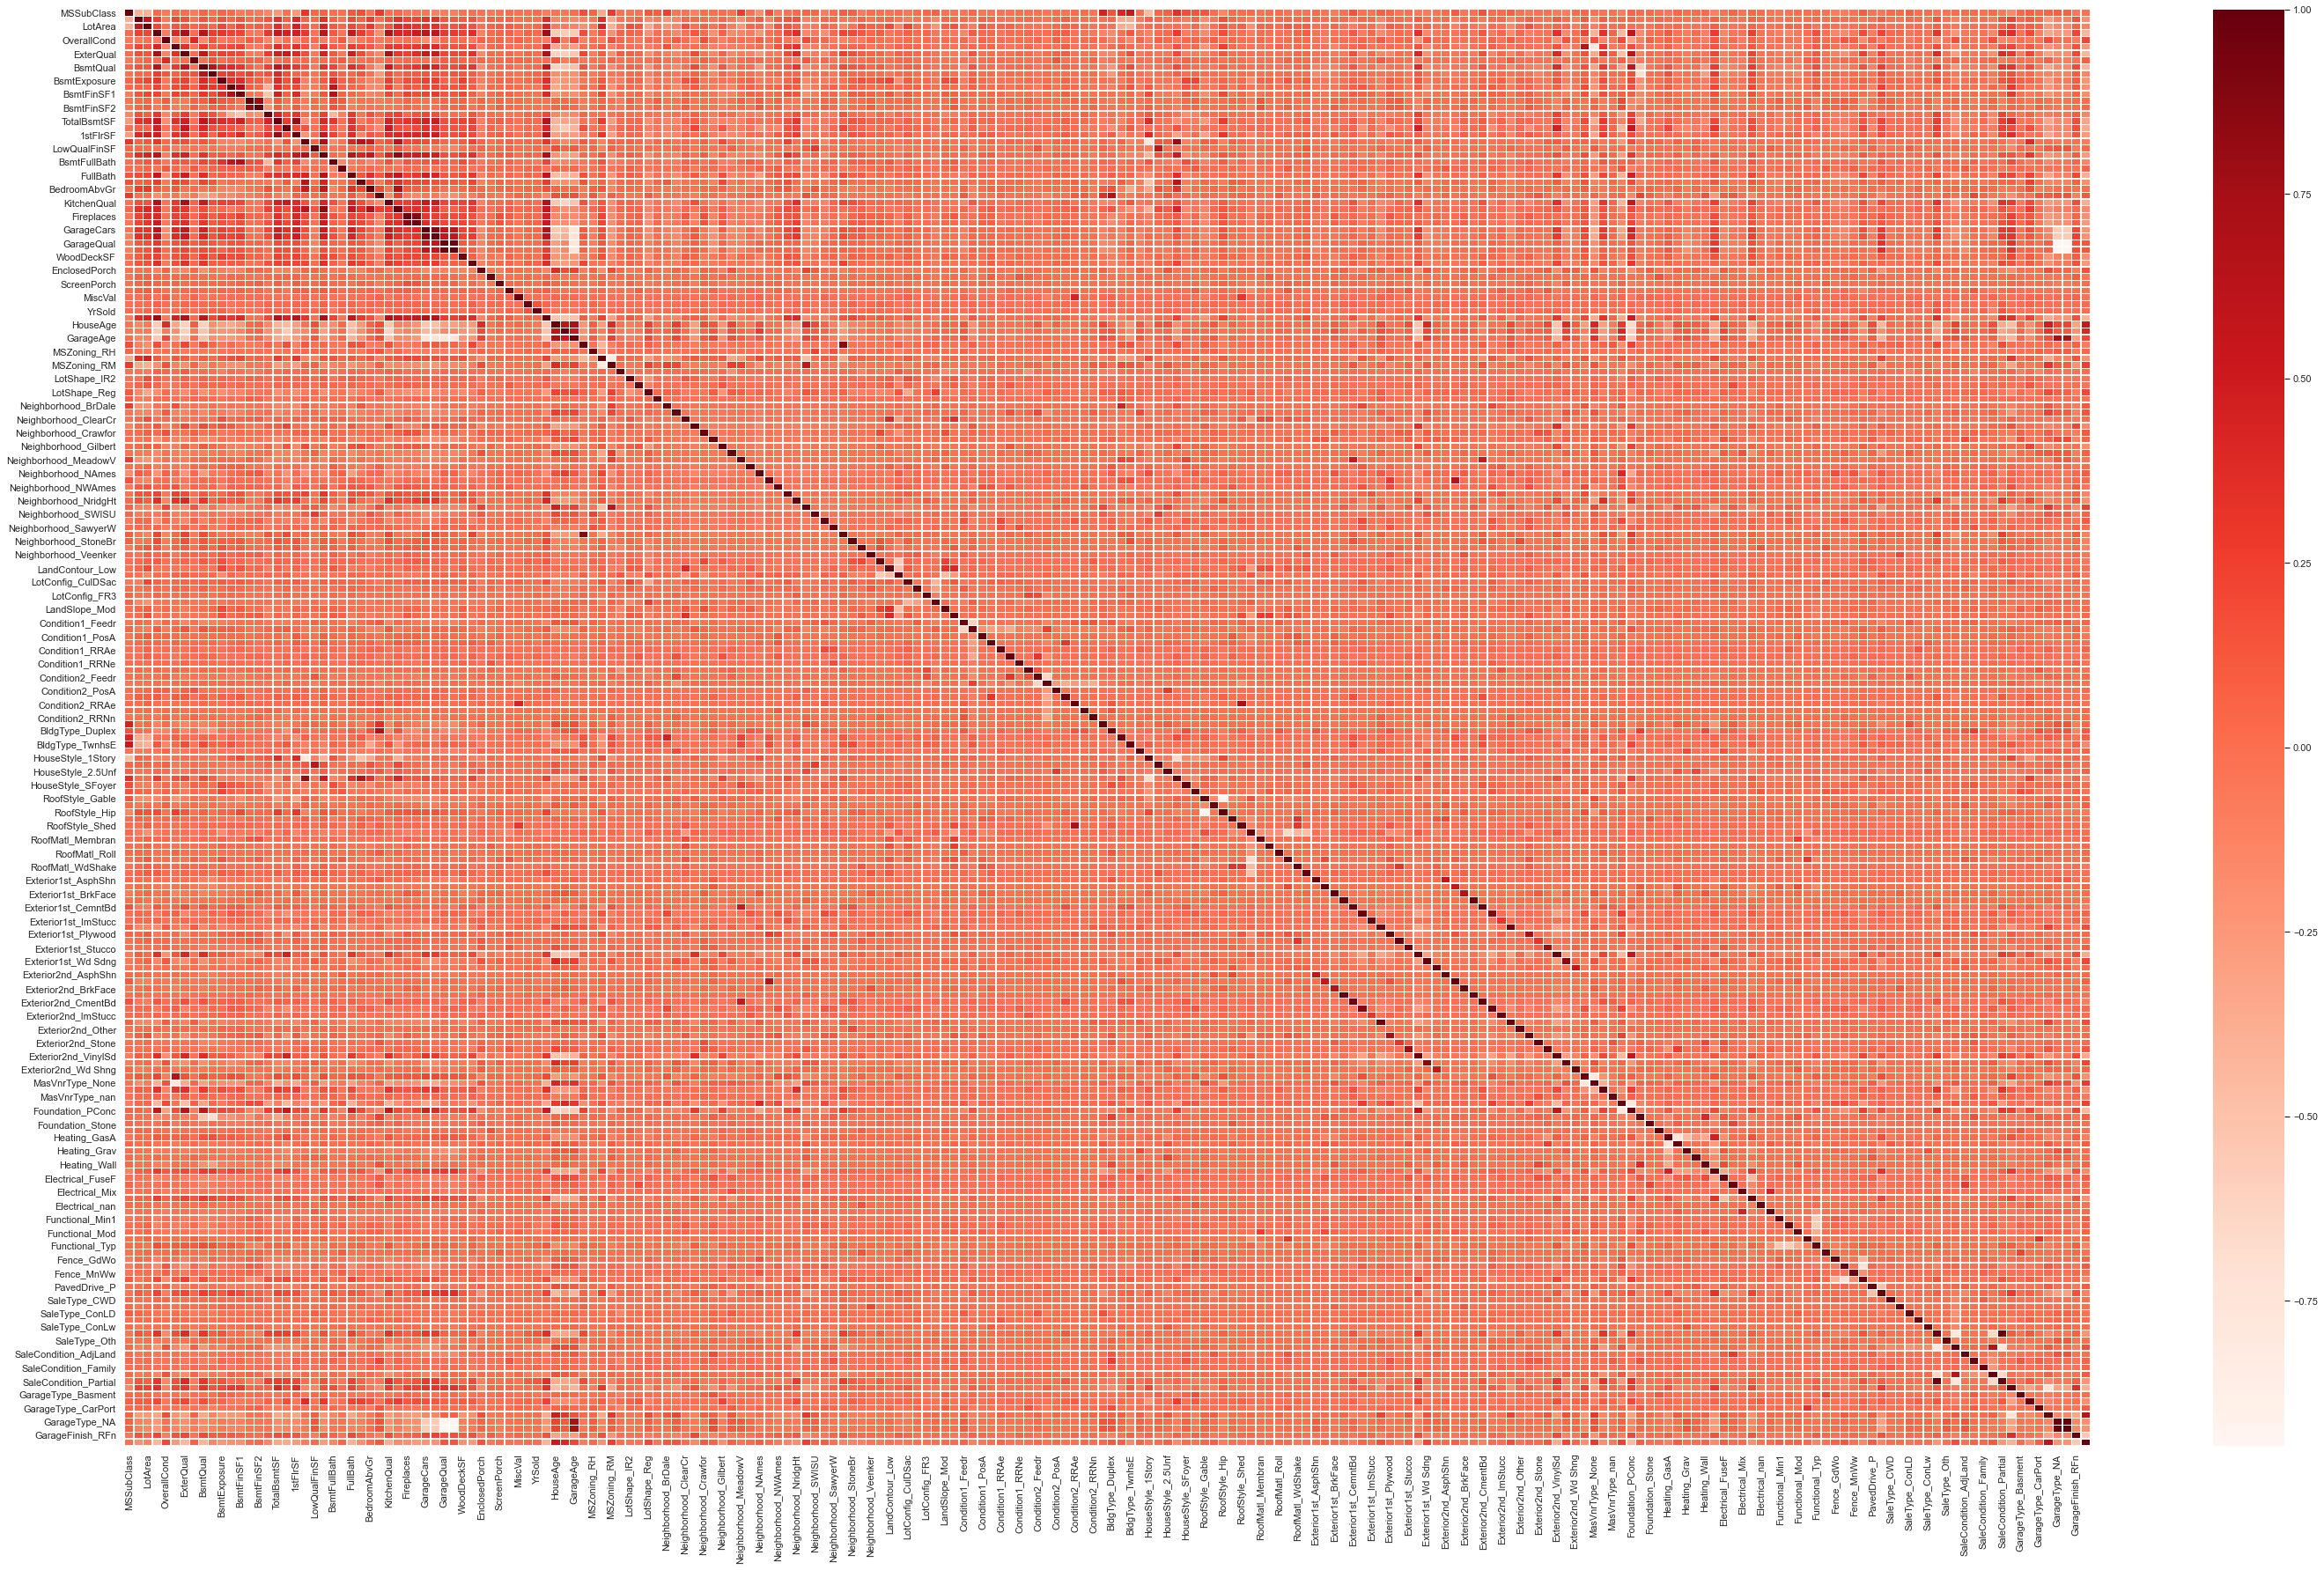

In [59]:
# Let's check the correlation coefficients to see which variables are highly correlated
fig, ax = plt.subplots(figsize = (50, 30))
sns.heatmap(X.corr(method ='pearson'), cmap ='Reds', linewidths = 0.30, annot = False)
plt.show()

In [60]:
# It is difficult to get the correlation from the heat map or correlation matrix.
# Instead sort the high correlation parameter pairs and following are printed.
# There seems to be many correlated variables in general in this dataset. Some of the high correlated variables are
# listed below. 
# NOTE: Here while sorting the sign of the correlation factor is not considered.

# It can be seen the garage conditions and quality variables are highly correlated
# Exterior1st: Exterior covering on house categories are also highly correlated
# In general we see there are highly correlated variables in the dataset.

c = X.corr(method ='pearson')
c1 = c.abs().unstack()
c1.sort_values(ascending = False)[214:275]


MSSubClass             MSSubClass               1.000000
GarageFinish_RFn       GarageFinish_RFn         1.000000
SaleType_New           SaleCondition_Partial    0.986819
SaleCondition_Partial  SaleType_New             0.986819
Exterior1st_VinylSd    Exterior2nd_VinylSd      0.977525
Exterior2nd_VinylSd    Exterior1st_VinylSd      0.977525
Exterior1st_CemntBd    Exterior2nd_CmentBd      0.974171
Exterior2nd_CmentBd    Exterior1st_CemntBd      0.974171
Exterior1st_MetalSd    Exterior2nd_MetalSd      0.973065
Exterior2nd_MetalSd    Exterior1st_MetalSd      0.973065
GarageCond             GarageQual               0.959172
GarageQual             GarageCond               0.959172
GarageType_NA          GarageCond               0.946245
GarageFinish_NA        GarageCond               0.946245
GarageCond             GarageFinish_NA          0.946245
                       GarageType_NA            0.946245
GarageQual             GarageFinish_NA          0.942499
                       GarageTy

In [61]:
# Identifying the variables to scale
ToScale = X.select_dtypes(include=['int64', 'int32', 'float64'])
colsToScale = list(ToScale.columns)

In [62]:
# Using standard scaler for the above variables.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaled_features = X.copy()
features = scaled_features[colsToScale]

#scaler = StandardScaler().fit(features.values)
scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[colsToScale] = features


In [63]:
# Just checking the scaled sample features
scaled_features.sample(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,HouseAge,RemodeledAge,GarageAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_nan,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_nan,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Utilities_NoSeWa,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
967,0.000000,0.493421,0.364902,0.444444,0.750,0.367732,0.333333,0.5,0.6,0.75,0.25,0.833333,0.506564,0.166667,0.000000,0.116286,0.525373,0.50,0.419521,0.0,0.0,0.316536,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.333333,0.333333,0.000000,0.0,0.25,0.277112,0.6,0.6,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.545455,0.50,0.139008,0.389706,0.885246,0.378571,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,

In [64]:
scaled_features.shape

(1460, 212)

In [65]:
# Changes for Subjective question number 3. Need to drop below columns for seeing its impact on Lasso Regression model
#scaled_features.drop(['Condition2_PosN', '1stFlrSF', '2ndFlrSF', 'OverallQual', 'RoofMatl_WdShngl'], axis =1, inplace = True)

In [66]:
y = scaled_features['SalePrice']
scaled_features.drop('SalePrice', axis =1, inplace = True)
scaled_features.shape

(1460, 211)

In [67]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, 
                                                      train_size = 0.7, test_size = 0.3, random_state = 100)

In [68]:
# Just for inspection
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,HouseAge,RemodeledAge,GarageAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_nan,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_nan,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Utilities_NoSeWa,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
210,0.058824,0.467105,0.254601,0.444444,0.625,0.00000,0.333333,0.50,0.6,0.75,0.25,0.500000,0.262829,0.166667,0.0,0.234945,0.408955,0.50,0.291029,0.000000,0.0,0.219587,0.333333,0.0,0.333333,0.0,0.250,0.333333,0.333333,0.250000,0.000000,0.0,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.173913,0.0,0.0,0.0,0.0,0.272727,0.50,0.610294,0.967213,1.000000,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0
318,0.235294,0.76

### Modelling and Evaluation of the models

### Linear Regression

In [69]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [70]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-0.7012820204924864
[-2.09579968e-02  6.36776626e-03  3.28162776e-02  1.06049828e-01
  6.22812157e-02  1.48983088e-02  3.53066672e-02 -2.38975061e-02
  3.89301681e-02 -5.01674372e-02  3.28176333e-02 -1.78428341e-03
  2.58027447e-01  9.94750370e-04  1.75937022e-01  2.02666893e-01
 -1.99937152e-01 -6.58418022e-04  3.91960158e-01  3.90424247e-01
  7.92770258e-02 -3.44234031e-01  1.65336551e-02 -6.33453166e-03
  2.24206812e-03  1.02811144e-03 -5.96645356e-02 -4.72173725e-02
  2.11991887e-02  4.50322533e-02  1.55527715e-02 -4.31267298e-03
  1.16208151e-02  2.86238350e-02  1.80231913e-02  7.67108337e-04
  8.02921570e-03  1.30636975e-02  5.51138786e-03  2.91258718e-02
  1.13344875e-02  7.89758552e-02  2.29766740e-02 -4.60364708e-03
  7.15429253e-05 -6.36809005e-02 -1.68744514e-03 -6.02420395e-03
  2.95323058e-02  2.91111133e-02  2.97698433e-02  2.77985915e-02
  1.02207558e-02  4.20731784e-03  1.54880450e-02  5.46157772e-03
  4.76281387e-02  2.15823274e-02  2.18663366e-02  8.32667675e-04
 -1.9

In [71]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr**0.5)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr**0.5)
metric.append(mse_test_lr**0.5)

0.9375275964810325
-5.452915999015205e+21
0.7687247031046083
2.9641076469809944e+22
0.027439269655028707
8226402042.833935


In [72]:
# In the above Linear Regression model, we see like a overfitting model and the performance of the test set is not right
# We have seen earlier that there are highly correlating variables seen in the dataset which are not handled in this simple 
# Linear Regression model. The errors in the test set are very high.

### Ridge Regression

In [73]:
# Now trying out regularized Linear regression
# Ridge model

from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,11,12, 20,25,28,29,30,31,35, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    3.8s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11, 12,
                                   20, 25, 28, 29, 30, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [74]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 8.0}


In [75]:
scaled_features.shape

(1460, 211)

In [76]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha =  8
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.intercept_ )
print(ridge.coef_)

-0.12754314700654037
[-1.98261984e-02  1.34677733e-02  2.92900867e-02  6.83131975e-02
  3.21637112e-02  1.29669720e-02  2.92225979e-02 -2.92637435e-03
  1.85477044e-02 -2.04555534e-02  3.31703497e-02  3.69867468e-03
  4.74317080e-02  3.86525783e-03  6.49107753e-03  4.78440526e-03
  3.83007642e-02  4.78861699e-03  6.17214089e-02  6.38730119e-02
 -5.32337677e-03  5.50543346e-02  9.35000876e-03 -3.58072595e-04
  2.46586131e-02  1.08104051e-02 -7.60785526e-03 -1.32867837e-02
  3.06635061e-02  1.63732036e-02  1.05631600e-02  9.30133783e-03
  2.24594327e-02  2.64620074e-02  5.89218463e-03 -6.53093162e-04
  8.97524730e-03  6.52351156e-03 -1.38661597e-03  8.68682441e-03
  7.54265780e-03  8.72721156e-03  1.01092614e-03 -5.13198778e-03
  1.13504960e-03 -1.35253836e-02 -1.27233281e-02 -9.59798512e-04
  5.88890477e-03  6.55470891e-03  7.15398457e-03  4.83461601e-03
  1.37410931e-03  2.78981069e-03 -1.46752309e-02  1.47427950e-03
  8.25178062e-04  4.25930910e-03  3.49076103e-03 -2.28858370e-03
 -1.

In [77]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)
#
rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)
#
mse_train_lr = mean_squared_error(y_train, y_pred_train)
#print(mse_train_lr)
print(mse_train_lr**0.5)
metric2.append(mse_train_lr**0.5)
#
mse_test_lr = mean_squared_error(y_test, y_pred_test)
#print(mse_test_lr)
print(mse_test_lr**0.5)
metric2.append(mse_test_lr**0.5)



0.8886204421592151
0.8695227545893218
1.3705286288062277
0.7092509786482198
0.036637951625609434
0.04024045814599517


In [78]:
lasso = Lasso()

#params = {'alpha': [0.0005,0.008,0.001,0.015,0.017,0.002 ]}
#params = {'alpha': [0.00017,0.002,0.0022,0.0024,0.0025,0.0028,0.003,0.0035, 0.0038, 0.004, 0.0045, 0.005 ]}
params = {'alpha': [0.0001,0.0002,0.0003,0.001,0.002,0.003,0.004, 0.005, 0.008, 0.01 ]}
#params = {'alpha': [0.003, 0.0035, 0.0038, 0.004 ]}

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.3s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.001, 0.002, 0.003,
                                   0.004, 0.005, 0.008, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [79]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0002}


In [80]:
scaled_features.shape

(1460, 211)

In [81]:
#Fitting Lasso model for alpha = 100 and printing coefficients which have been penalised

alpha =0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0002)

In [82]:
print(lasso.coef_)
print(lasso.intercept_)

[-2.72561728e-02  5.97255053e-03  2.30196038e-02  1.16046928e-01
  3.49736855e-02  5.76340914e-03  2.86320160e-02 -0.00000000e+00
  0.00000000e+00 -9.30830371e-03  3.60159437e-02  0.00000000e+00
  5.39356216e-02  1.82324814e-03  0.00000000e+00  0.00000000e+00
  3.23754609e-02  3.89299383e-04  1.41359944e-01  1.38838873e-01
  0.00000000e+00  0.00000000e+00  1.87357796e-03 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.57292246e-03 -0.00000000e+00
  2.95392985e-02 -0.00000000e+00  0.00000000e+00  8.89478569e-03
  1.96317957e-02  1.49776714e-02 -0.00000000e+00 -0.00000000e+00
  5.52560429e-03  4.14202588e-03 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -3.16471163e-03
  0.00000000e+00 -2.13874293e-02 -8.74747451e-03 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  4.10828955e-03 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.65816675e-03  1.79904690e-04
  0.00000000e+00  0.00000000e+00  3.94844486e-03  0.00000000e+00
 -1.04922562e-03  1.80359

In [83]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr**0.5)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr**0.5)
metric3.append(mse_test_lr**0.5)

0.8920829585635467
0.8679814822775207
1.3279222659166279
0.7176290593784475
0.03606396355237972
0.04047743210724286


In [87]:
# Number of non-zero Lasso coefficients
nonZeroLasso = [coeff for coeff in lasso.coef_ if coeff != 0]
len(nonZeroLasso)

75

In [84]:
# Creating a table which contain all the metrics for Linear, Ridge and Lasso regression

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'RMSE (Train)','RMSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.375276e-01,0.888620,0.892083
1,R2 Score (Test),-5.452916e+21,0.869523,0.867981
2,RSS (Train),7.687247e-01,1.370529,1.327922
3,RSS (Test),2.964108e+22,0.709251,0.717629
4,RMSE (Train),2.743927e-02,0.036638,0.036064
5,RMSE (Test),8.226402e+09,0.040240,0.040477


In [95]:
# Dataframe showing the variable coefficients sorted from Ridge Model
rid_betas =  pd.DataFrame(index = X_train.columns)
rid_betas.rows = X_train.columns
rid_betas["Ridge"]=ridge.coef_
rid_betas.iloc[(-np.abs(rid_betas['Ridge'].values)).argsort()].head(10)

,Ridge
OverallQual,0.068313
2ndFlrSF,0.063873
1stFlrSF,0.061721
GrLivArea,0.055054
RoofMatl_WdShngl,0.049550
Neighborhood_NoRidge,0.047707
BsmtFinSF1,0.047432
TotalBsmtSF,0.038301
Neighborhood_NridgHt,0.037875
BsmtExposure,0.033170


In [96]:
# Dataframe showing the variable coefficients sorted from Lasso Model
ls_betas =  pd.DataFrame(index = X_train.columns)
ls_betas.rows = X_train.columns
ls_betas["Lasso"]=lasso.coef_
ls_betas.iloc[(-np.abs(ls_betas['Lasso'].values)).argsort()].head(10)

,Lasso
Condition2_PosN,-0.151107
1stFlrSF,0.141360
2ndFlrSF,0.138839
OverallQual,0.116047
RoofMatl_WdShngl,0.089237
Neighborhood_NoRidge,0.058176
BsmtFinSF1,0.053936
Neighborhood_NridgHt,0.050042
BsmtExposure,0.036016
OverallCond,0.034974
